In [42]:
#Q1. Plot the monthly beer demand and discuss your observations.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

# Load the dataset
df = pd.read_csv('tableA3.csv')

In [43]:
df.head()

,Time,Beer Consumption (lt),Average Beer Price,Average Raki Price*,Average Canned Soft Drink Price*,Average Canned Beer Price,Average Draft Beer Price
0,Jan '87,13621800.0,1338.42,9715.74,2208.12,2671.75,971.57
1,Feb '87,14346944.0,1314.44,9460.31,2150.07,2866.48,946.03
2,Mar '87,14912839.0,1267.54,9122.77,2073.36,2764.20,912.28
3,Apr '87,16129850.0,1241.47,8935.13,2030.71,2707.35,893.51
4,May '87,12140503.0,1183.48,8517.76,1935.85,2580.88,851.78


In [44]:
print(df['Time'].dtypes)

object


In [45]:
df['Time'] = pd.to_datetime(df['Time'], format="%b '%y")

In [46]:
df.head()

,Time,Beer Consumption (lt),Average Beer Price,Average Raki Price*,Average Canned Soft Drink Price*,Average Canned Beer Price,Average Draft Beer Price
0,1987-01-01,13621800.0,1338.42,9715.74,2208.12,2671.75,971.57
1,1987-02-01,14346944.0,1314.44,9460.31,2150.07,2866.48,946.03
2,1987-03-01,14912839.0,1267.54,9122.77,2073.36,2764.20,912.28
3,1987-04-01,16129850.0,1241.47,8935.13,2030.71,2707.35,893.51
4,1987-05-01,12140503.0,1183.48,8517.76,1935.85,2580.88,851.78


In [47]:
df.columns = df.columns.str.strip()
df['Time'] = pd.to_datetime(df['Time'], format="%b '%y")
df = df.sort_values('Time')

# Plot interactive line chart
fig = px.line(df, x='Time', y='Beer Consumption  (lt)', markers=True,
              title='Monthly Beer Consumption Over Time',
              labels={'Beer Consumption  (lt)': 'Beer Consumption (liters)', 'Time': 'Date'})

# Format y-axis to show full numbers with commas
fig.update_layout(yaxis_tickformat=",") 

fig.show()


In [48]:
print("""Observation:

1. Strong Seasonality
   a. There is a repeating annual cycle where beer consumption spikes every year.
   b. Peaks consistently occur around mid-year (likely summer months: June–August).
   c. Lows consistently occur around end or beginning of each year (likely winter months: December–February).
      So we can say that beer is more popular in warmer months.

2. Upward Trend
   The peak consumption values increase over time: In 1987–1988, peaks are around 30 million liters,
   and by 1993, they exceed 70 million liters.
   So, overall beer demand is growing — could be due to population growth or increased tourism.

3. Year-over-Year Consistency
   Every year shows a clear rise and fall pattern.

4. Sharp Transitions
   There are sharp increases leading into summer and rapid drops afterward.
   Consumption doesn’t taper gradually — it spikes up and down;
   this may be due to Ramadaan holidays (in some years, we can see a sudden spike after Ramadaan ends).
""")


Observation:

1. Strong Seasonality
   a. There is a repeating annual cycle where beer consumption spikes every year.
   b. Peaks consistently occur around mid-year (likely summer months: June–August).
   c. Lows consistently occur around end or beginning of each year (likely winter months: December–February).
      So we can say that beer is more popular in warmer months.

2. Upward Trend
   The peak consumption values increase over time: In 1987–1988, peaks are around 30 million liters,
   and by 1993, they exceed 70 million liters.
   So, overall beer demand is growing — could be due to population growth or increased tourism.

3. Year-over-Year Consistency
   Every year shows a clear rise and fall pattern.

4. Sharp Transitions
   There are sharp increases leading into summer and rapid drops afterward.
   Consumption doesn’t taper gradually — it spikes up and down;
   this may be due to Ramadaan holidays (in some years, we can see a sudden spike after Ramadaan ends).



In [49]:
tourism_df = pd.read_csv('tableA4.csv')

# Clean column names if needed
tourism_df.columns = tourism_df.columns.str.strip()

# Create Year and Month columns in df to join with tourism_df
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month


# Months are text, so convert them:
tourism_df['Month'] = tourism_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August': 8, 'September': 9, 'October':10, 'November': 11,
                                               'December':12})

In [50]:
import numpy as np
import statsmodels.api as sm

In [55]:
import pandas as pd

# Define beer consumption data
beer_data = {
    'Country': [
        'Czechoslovakia', 'Germany', 'Denmark', 'Austria', 'Ireland',
        'Belgium', 'United Kingdom', 'Luxembourg', 'Australia', 'United States',
        'The Netherlands', 'Finland', 'Venezuela', 'Canada', 'Sweden',
        'Spain', 'Portugal', 'Japan', 'South Africa', 'Norway',
        'Mexico', 'Columbia', 'France', 'Korea', 'China Hong Kong',
        'Italy', 'China Taiwan', 'China'
    ],
    'Beer_Consumption_Liters_per_Capita': [
        163, 138, 126, 118, 113,
        108, 100, 104, 96, 86,
        85, 86, 77, 71, 64,
        67, 64, 56, 55, 50,
        47, 41, 39, 34, 28,
        25, 23, 10
    ]
}

# Create DataFrame
beer_df = pd.DataFrame(beer_data)

beer_df.head()


,Country,Beer_Consumption_Liters_per_Capita
0,Czechoslovakia,163
1,Germany,138
2,Denmark,126
3,Austria,118
4,Ireland,113


In [56]:
# Define the countries in tourism data
countries = ['Czechoslovakia', 'Germany', 'The United Kingdom', 'The United States', 'France', 'Others (Total)']
# Create a mapping dictionary
beer_per_capita = {
    'Czechoslovakia': beer_df.loc[beer_df['Country'] == 'Czechoslovakia', 'Beer_Consumption_Liters_per_Capita'].values[0],
    'Germany': beer_df.loc[beer_df['Country'] == 'Germany', 'Beer_Consumption_Liters_per_Capita'].values[0],
    'The United Kingdom': beer_df.loc[beer_df['Country'] == 'United Kingdom', 'Beer_Consumption_Liters_per_Capita'].values[0],
    'The United States': beer_df.loc[beer_df['Country'] == 'United States', 'Beer_Consumption_Liters_per_Capita'].values[0],
    'France': beer_df.loc[beer_df['Country'] == 'France', 'Beer_Consumption_Liters_per_Capita'].values[0]
}



# Filter out named countries from beer_df
others_df = beer_df[~beer_df['Country'].isin(countries)]

# Compute the average beer consumption for 'Others (Total)'
beer_per_capita['Others (Total)'] = others_df['Beer_Consumption_Liters_per_Capita'].mean()

tourism_df['Tourism_Factor'] = (
    tourism_df['Czechoslovakia'] * beer_per_capita['Czechoslovakia'] +
    tourism_df['Germany'] * beer_per_capita['Germany'] +
    tourism_df['The United Kingdom'] * beer_per_capita['The United Kingdom'] +
    tourism_df['The United States'] * beer_per_capita['The United States'] +
    tourism_df['France'] * beer_per_capita['France'] +
    tourism_df['Others (Total)'] * beer_per_capita['Others (Total)']
)

In [57]:
tourism_df.head(3)

,Year,Month,Czechoslovakia,Germany,The United Kingdom,The United States,France,Others (Total),Tourism_Factor,Date
0,1987,1,290,28056,11380,25060,9246,35135,10009715.60,1987-01-01
1,1987,2,253,29715,20630,21648,11941,38488,11201863.68,1987-02-01
2,1987,3,478,67370,30506,30386,15810,53071,19336364.56,1987-03-01


In [58]:
# Clean the Month and Year columns
tourism_df['Month'] = tourism_df['Month'].astype(str).str.replace('.0', '', regex=False).astype(int)
tourism_df['Year'] = tourism_df['Year'].astype(str).str.replace('.0', '', regex=False).astype(int)

# Create the Date column (assume day = 1)
tourism_df['Date'] = pd.to_datetime(tourism_df[['Year', 'Month']].assign(DAY=1))


In [59]:
tourism_df.head(10)

,Year,Month,Czechoslovakia,Germany,The United Kingdom,The United States,France,Others (Total),Tourism_Factor,Date
0,1987,1,290,28056,11380,25060,9246,35135,1.000972e+07,1987-01-01
1,1987,2,253,29715,20630,21648,11941,38488,1.120186e+07,1987-02-01
2,1987,3,478,67370,30506,30386,15810,53071,1.933636e+07,1987-03-01
3,1987,4,1025,271147,70016,43137,94247,141639,6.179646e+07,1987-04-01
4,1987,5,2776,405921,165298,69696,155816,225780,1.007302e+08,1987-05-01
5,1987,6,8785,381631,232010,109948,121463,308797,1.129088e+08,1987-06-01
6,1987,7,3237,373879,210241,83961,134242,398464,1.132406e+08,1987-07-01
7,1987,8,3282,402119,216347,85511,144832,444706,1.215093e+08,1987-08-01
8,1987,9,10501,421316,263963,91515,108564,346902,1.224150e+08,1987-09-01
9,1987,10,6286,365320,189557,88835,59556,230538,9.634709e+07,1987-10-01


In [63]:
df['Date']=df['Time']

In [66]:
merged_df = pd.merge(df, tourism_df, on='Date')
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

In [67]:
merged_df.head(3)

,Time,Beer Consumption (lt),Average Beer Price,Average Raki Price*,Average Canned Soft Drink Price*,Average Canned Beer Price,Average Draft Beer Price,Year_x,Month_x,Date,Year_y,Month_y,Czechoslovakia,Germany,The United Kingdom,The United States,France,Others (Total),Tourism_Factor
0,1987-01-01,13621800.0,1338.42,9715.74,2208.12,2671.75,971.57,1987,1,1987-01-01,1987,1,290,28056,11380,25060,9246,35135,10009715.60
1,1987-02-01,14346944.0,1314.44,9460.31,2150.07,2866.48,946.03,1987,2,1987-02-01,1987,2,253,29715,20630,21648,11941,38488,11201863.68
2,1987-03-01,14912839.0,1267.54,9122.77,2073.36,2764.20,912.28,1987,3,1987-03-01,1987,3,478,67370,30506,30386,15810,53071,19336364.56


In [70]:
merged_df=merged_df.drop(columns=['Year_x','Year_y','Month_x','Month_y'])
# Add trend and month
merged_df['Trend'] = range(1, len(merged_df) + 1)
merged_df['Month'] = merged_df['Date'].dt.month_name()

In [71]:
merged_df.head(3)

,Time,Beer Consumption (lt),Average Beer Price,Average Raki Price*,Average Canned Soft Drink Price*,Average Canned Beer Price,Average Draft Beer Price,Date,Czechoslovakia,Germany,The United Kingdom,The United States,France,Others (Total),Tourism_Factor,Trend,Month
0,1987-01-01,13621800.0,1338.42,9715.74,2208.12,2671.75,971.57,1987-01-01,290,28056,11380,25060,9246,35135,10009715.60,1,January
1,1987-02-01,14346944.0,1314.44,9460.31,2150.07,2866.48,946.03,1987-02-01,253,29715,20630,21648,11941,38488,11201863.68,2,February
2,1987-03-01,14912839.0,1267.54,9122.77,2073.36,2764.20,912.28,1987-03-01,478,67370,30506,30386,15810,53071,19336364.56,3,March


In [75]:
# Define Ramadan affected months per year
ramadan_months = {
    1987: [4, 5],
    1988: [4, 5],
    1989: [4, 5],
    1990: [3, 4],
    1991: [3, 4],
    1992: [3, 4],
    1993: [2, 3],
    1994: [2, 3],
}

# Function to assign Ramadan_Effect = 1 or 0
def is_ramadan(row):
    return int(row['Month'] in ramadan_months.get(row['Year'], []))

# Apply to DataFrame
df['Ramadan_Effect'] = df.apply(is_ramadan, axis=1)

In [76]:
merged_df['Ramadan_Effect']= df['Ramadan_Effect']

In [81]:
# Map months to season effect values:
# 1 → Summer (high consumption)
# -1 → Winter (low consumption)
# 0 → Neutral (Spring/Autumn)

def season_trend(month):
    if month in [6, 7, 8]:        # June, July, August
        return 1
    elif month in [12, 1, 2]:     # December, January, February
        return -1
    else:                         # March, April, May, September, October, November
        return 0

merged_df['Season_Trend'] = merged_df['Trend'].apply(season_trend)



In [90]:
# Create relative price features
merged_df['Raki_to_Beer'] = merged_df['Average Raki Price*'] / merged_df['Average Beer Price']
merged_df['SoftDrink_to_Beer'] = merged_df['Average Canned Soft Drink Price*'] / merged_df['Average Canned Beer Price']
merged_df['Raki_to_Draft'] = merged_df['Average Raki Price*'] / merged_df['Average Draft Beer Price']
merged_df['SoftDrink_to_Draft'] = merged_df['Average Canned Soft Drink Price*'] / merged_df['Average Draft Beer Price']
merged_df['Draft_to_Canned_Beer'] = merged_df['Average Draft Beer Price'] / merged_df['Average Canned Beer Price']

In [91]:
merged_df.head(3)

,Time,Beer Consumption (lt),Average Beer Price,Average Raki Price*,Average Canned Soft Drink Price*,Average Canned Beer Price,Average Draft Beer Price,Date,Czechoslovakia,Germany,...,Tourism_Factor,Trend,Month,Ramadan_Effect,Season_Trend,Raki_to_Draft,SoftDrink_to_Draft,Draft_to_Canned_Beer,Raki_to_Beer,SoftDrink_to_Beer
0,1987-01-01,13621800.0,1338.42,9715.74,2208.12,2671.75,971.57,1987-01-01,290,28056,...,10009715.60,1,January,0,-1,10.000041,2.272734,0.363646,7.259111,0.826470
1,1987-02-01,14346944.0,1314.44,9460.31,2150.07,2866.48,946.03,1987-02-01,253,29715,...,11201863.68,2,February,0,-1,10.000011,2.272729,0.330032,7.197217,0.750073
2,1987-03-01,14912839.0,1267.54,9122.77,2073.36,2764.20,912.28,1987-03-01,478,67370,...,19336364.56,3,March,0,0,9.999967,2.272723,0.330034,7.197225,0.750076


In [96]:
import statsmodels.api as sm


# 1. Define independent variables (X) and dependent variable (y)
X = merged_df[['Tourism_Factor', 'Raki_to_Beer', 'SoftDrink_to_Beer', 'Trend', 'Ramadan_Effect', 'Season_Trend']]
y = merged_df.iloc[:, 1]

# 2. Add constant (intercept) to X
X = sm.add_constant(X)

# 3. Fit the Multiple Linear Regression model
model = sm.OLS(y, X).fit()

# 4. Print the summary
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.873
Model:                                OLS   Adj. R-squared:                  0.863
Method:                     Least Squares   F-statistic:                     88.29
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           1.88e-32
Time:                            20:06:26   Log-Likelihood:                -1413.7
No. Observations:                      84   AIC:                             2841.
Df Residuals:                          77   BIC:                             2858.
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [98]:
print(
    """ 
Q2.
Model Fit & Validity
1. R-squared = 0.873
Model explains 87.3% of the variation in beer consumption.

2. Adjusted R-squared = 0.863
After accounting for the number of predictors, the model still explains 86.3% of the variance. This shows minimal overfitting.

3. F-statistic = 88.29, p-value < 0.00001
The overall model is statistically significant; at least one predictor has a meaningful impact on beer consumption.

| Predictor         | Coefficient | p-value | Interpretation                                                                                                                           |
| ----------------- | ----------- | ------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| Tourism Factor    | 0.1045      | 0.000   | Highly significant                                                                                                                       |
| Trend             | 2.121e+05   | 0.000   | Strong upward trend                                                                                                                      | 
| Ramadan Effect    | -7.91e+06   | 0.000   | Significantly negative: During Ramadan, beer demand drops                                                                                |
| Raki to Beer      | 1.60e+06    | 0.056   | Marginal: At 5.6% significance level, not conventionally significant. Still suggests raki price increase might shift demand toward beer. |
| SoftDrink to Beer | 1.32e+07    | 0.183   | Not significant: No strong evidence that soft drink prices influence beer demand.                                                        |
| Season Trend      | 1.88e+06    | 0.390   | Not significant: Seasonality does not show strong effect                                                                                 |

"""
)

 
Q2.
Model Fit & Validity
1. R-squared = 0.873
Model explains 87.3% of the variation in beer consumption.

2. Adjusted R-squared = 0.863
After accounting for the number of predictors, the model still explains 86.3% of the variance. This shows minimal overfitting.

3. F-statistic = 88.29, p-value < 0.00001
The overall model is statistically significant; at least one predictor has a meaningful impact on beer consumption.

| Predictor         | Coefficient | p-value | Interpretation                                                                                                                           |
| ----------------- | ----------- | ------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| Tourism Factor    | 0.1045      | 0.000   | Highly significant                                                                                                                       |
| Trend             

In [99]:
print(
    """ 
Q3. 
Issue with the model:
a. Multicollineraity is high (2.69e+09)
b. Multiple varibles which are not statistically significant.
We will remove insignificant varibales one by one and check the model.

"""
)

 
Q3. 
Issue with the model:
a. Multicollineraity is high (2.69e+09)
b. Multiple varibles which are not statistically significant.
We will remove insignificant varibales one by one and check the model.




In [100]:
X_new = X.drop(columns=['Season_Trend'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())


                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.872
Model:                                OLS   Adj. R-squared:                  0.864
Method:                     Least Squares   F-statistic:                     106.1
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           2.50e-33
Time:                            20:25:00   Log-Likelihood:                -1414.1
No. Observations:                      84   AIC:                             2840.
Df Residuals:                          78   BIC:                             2855.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [101]:
print(
    """ 
Even after removing the 'season_trend' variable, the other two variables are still not statistically significant. But the p-value of 'Softdrink_to_Beer' increased.
Now let's remove one by one other non significant variables.

"""
)

 
Even after removing the 'season_trend' variable, the other two variables are still not statistically significant. But the p-value of 'Softdrink_to_Beer' increased.
Now let's remove one by one other non significant variables.




In [102]:
X_new = X.drop(columns=['SoftDrink_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.870
Model:                                OLS   Adj. R-squared:                  0.862
Method:                     Least Squares   F-statistic:                     104.5
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           4.21e-33
Time:                            20:29:38   Log-Likelihood:                -1414.7
No. Observations:                      84   AIC:                             2841.
Df Residuals:                          78   BIC:                             2856.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

In [103]:
X_new = X.drop(columns=['Raki_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.867
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     101.6
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           1.10e-32
Time:                            20:30:15   Log-Likelihood:                -1415.7
No. Observations:                      84   AIC:                             2843.
Df Residuals:                          78   BIC:                             2858.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [104]:
X_new = X.drop(columns=['Season_Trend','SoftDrink_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.869
Model:                                OLS   Adj. R-squared:                  0.863
Method:                     Least Squares   F-statistic:                     131.5
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           4.19e-34
Time:                            20:30:59   Log-Likelihood:                -1414.9
No. Observations:                      84   AIC:                             2840.
Df Residuals:                          79   BIC:                             2852.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

In [105]:
X_new = X.drop(columns=['Season_Trend','Raki_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.866
Model:                                OLS   Adj. R-squared:                  0.859
Method:                     Least Squares   F-statistic:                     127.3
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           1.30e-33
Time:                            20:31:28   Log-Likelihood:                -1416.1
No. Observations:                      84   AIC:                             2842.
Df Residuals:                          79   BIC:                             2854.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [106]:
X_new = X.drop(columns=['Raki_to_Beer','SoftDrink_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.858
Model:                                OLS   Adj. R-squared:                  0.850
Method:                     Least Squares   F-statistic:                     119.0
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           1.27e-32
Time:                            20:32:05   Log-Likelihood:                -1418.5
No. Observations:                      84   AIC:                             2847.
Df Residuals:                          79   BIC:                             2859.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

In [107]:
print(
    """ 
After series of removal using different combination of non-significant variable, we can see that if we remove Seaonal_Trend and SoftDrink_to_Beer variable, all other variables remain as significant.
The result of that model will be following:

"""
)

 
After series of removal using different combination of non-significant variable, we can see that if we remove Seaonal_Trend and SoftDrink_to_Beer variable, all other variables remain as significant.
The result of that model will be following:




In [108]:
X_new = X.drop(columns=['Season_Trend','SoftDrink_to_Beer'])
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     Beer Consumption  (lt)   R-squared:                       0.869
Model:                                OLS   Adj. R-squared:                  0.863
Method:                     Least Squares   F-statistic:                     131.5
Date:                    Wed, 23 Jul 2025   Prob (F-statistic):           4.19e-34
Time:                            20:34:36   Log-Likelihood:                -1414.9
No. Observations:                      84   AIC:                             2840.
Df Residuals:                          79   BIC:                             2852.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

In [123]:
print("""Q4. Are there unusual observations? Interpret and discuss.
Ans: Unusual months with residual, having standard deviation from mean is more""")

merged_df['Month_of_Year'] = merged_df['Time'].dt.month

# Extract Year column for grouping
merged_df['Year'] = merged_df['Time'].dt.year
# Step 1: Get residuals from the model
merged_df['Residual'] = model.resid

# Step 2: Calculate basic summary stats
mean_resid = merged_df['Residual'].mean()
std_resid = merged_df['Residual'].std()

# Step 3: Flag values that are far from the average
# We'll say anything 2 standard deviations from mean is unusual
merged_df['Unusual'] = merged_df['Residual'].apply(lambda x: 'Yes' if abs(x - mean_resid) > 2*std_resid else 'No')

# Step 4: See which months were unusual
unusual_months = merged_df[merged_df['Unusual'] == 'Yes']
print(unusual_months[['Date', df.columns[1], 'Residual']])


Q4. Are there unusual observations? Interpret and discuss.
Ans: Unusual months with residual, having standard deviation from mean is more
         Date  Beer Consumption  (lt)      Residual
54 1991-07-01              52542044.0  1.416971e+07
75 1993-04-01              32558242.0 -1.022224e+07
79 1993-08-01              69983870.0  1.365727e+07


In [114]:
print("After calculating residuals (difference between actual and predicted beer consumption), we marked observations that were more than 2 standard deviations from the mean as 'unusal'")

After calculating residuals (difference between actual and predicted beer consumption), we marked observations that were more than 2 standard deviations from the mean as 'unusal'


C:\Users\ajaya\AppData\Local\Temp\ipykernel_16128\1333097295.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



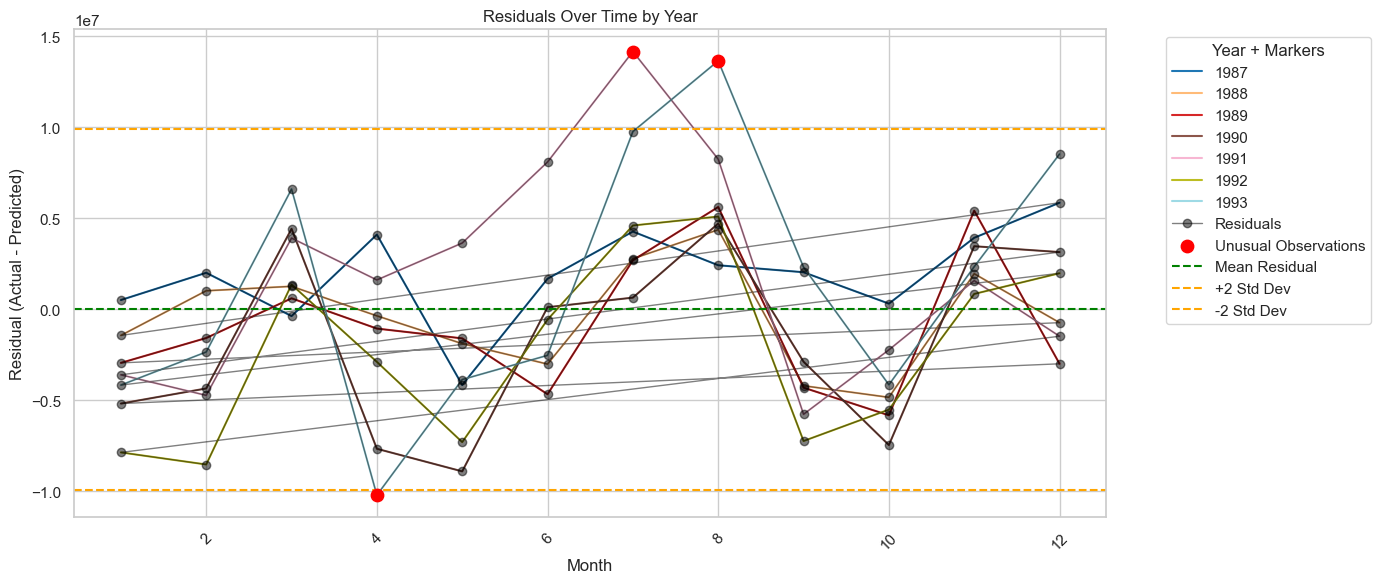

In [139]:
import seaborn as sns
import matplotlib.cm as cm

# Use seaborn styling
sns.set(style='whitegrid')

# Single figure for everything
plt.figure(figsize=(14, 6))

# Generate a color palette based on number of unique years
years = sorted(merged_df['Year'].unique())
years = [int(year) for year in years]  # Convert from np.int32 to regular int

# Get colormap and normalize to number of years
cmap = cm.get_cmap('tab20', len(years))  # 'tab20' gives 20 distinct colors

# Plot residuals per year with unique color
for idx, year in enumerate(years):
    data = merged_df[merged_df['Year'] == year]
    color = cmap(idx)
    plt.plot(data['Month_of_Year'], data['Residual'], label=str(year), color=color)

# Overlay: Line and scatter for residuals and unusual observations
plt.plot(merged_df['Month_of_Year'], merged_df['Residual'], marker='o', label='Residuals', color='black', linewidth=1, alpha=0.5)
plt.scatter(unusual_months['Month_of_Year'], unusual_months['Residual'], color='red', s=80, label='Unusual Observations', zorder=5)

# Add mean and ±2 std dev lines
plt.axhline(mean_resid, color='green', linestyle='--', label='Mean Residual')
plt.axhline(mean_resid + 2 * std_resid, color='orange', linestyle='--', label='+2 Std Dev')
plt.axhline(mean_resid - 2 * std_resid, color='orange', linestyle='--', label='-2 Std Dev')

# Labels and formatting
plt.title('Residuals Over Time by Year')
plt.xlabel('Month')
plt.ylabel('Residual (Actual - Predicted)')
plt.xticks(rotation=45)
plt.legend(title='Year + Markers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [141]:
import plotly.express as px
import pandas as pd


# Rename for clarity (if not already renamed)
merged_df['Actual'] = merged_df['Beer Consumption  (lt)']

# Generate predicted values
merged_df['Predicted'] = model_new.predict(sm.add_constant(X_new))

# Melt the DataFrame to long format for Plotly
df_melted = merged_df.melt(id_vars='Time', value_vars=['Actual', 'Predicted'],
                           var_name='Type', value_name='Beer Consumption')

# Plot interactive line chart
fig = px.line(df_melted, x='Time', y='Beer Consumption', color='Type',
              markers=True, title='Monthly Beer Consumption: Actual vs Predicted',
              labels={'Time': 'Date', 'Beer Consumption': 'Consumption (liters)', 'Type': 'Legend'})

# Format y-axis to show full numbers with commas
fig.update_layout(yaxis_tickformat=",")

# Optional: zoom, hover, etc.
fig.update_traces(mode='lines+markers')
fig.show()



In [142]:
print(
    """ 
Q5. 
Predictive capability of each variable (in old model):
Tourism: High
Relative Raki Price: Low
Relative Soft Drink Price: Low
Trend: High
Ramadan Effect: Medium/High
Seasonality Effect: Low

So, we removed Seasonality Effect and Relative Soft Drink Price to make Relative Raki Price as a significant variable. In our new model:
Tourism: High
Relative Raki Price: High
Trend: High
Ramadan Effect: Medium/High

For predicting following year values
Assumptions:
Tourism: +5% increase over last year’s monthly values.
Relative Raki Price: Same as last known month.
Ramadan Days: Given already
Trend: Continue the sequence by adding 12 more months.
"""
)

 
Q5. 
Predictive capability of each variable (in old model):
Tourism: High
Relative Raki Price: Low
Relative Soft Drink Price: Low
Trend: High
Ramadan Effect: Medium/High
Seasonality Effect: Low

So, we removed Seasonality Effect and Relative Soft Drink Price to make Relative Raki Price as a significant variable. In our new model:
Tourism: High
Relative Raki Price: High
Trend: High
Ramadan Effect: Medium/High

For predicting following year values
Assumptions:
Tourism: +5% increase over last year’s monthly values.
Relative Raki Price: Same as last known month.
Ramadan Days: Given already
Trend: Continue the sequence by adding 12 more months.



In [150]:
# Let's assume last date is Dec 1993
future_dates = pd.date_range(start='1994-01-01', periods=12, freq='MS')

future_df = pd.DataFrame({
    'Time': future_dates,
    'Month_of_Year': future_dates.month,
    'Year': future_dates.year,
    'Trend': range(merged_df['Trend'].max() + 1, merged_df['Trend'].max() + 13)
})

# Assume 5% increase in tourism_factor
monthly_tourism_avg = merged_df.groupby('Month_of_Year')['Tourism_Factor'].mean().values
future_df['Tourism'] = monthly_tourism_avg * 1.05

# Assume last known relative prices
future_df['Raki_to_Beer'] = merged_df['Raki_to_Beer'].iloc[-1]
future_df['Raki_to_Beer'] = future_df['Raki_to_Beer'].astype(float)

# Ramadan
def is_ramadan(row):
    return 1 if row['Month_of_Year'] in ramadan_months.get(row['Year'], []) else 0

future_df['Ramadan_Effect'] = future_df.apply(is_ramadan, axis=1)


# Select predictor columns for prediction
X_future = future_df[['Tourism', 'Raki_to_Beer', 'Trend', 'Ramadan_Effect']]
X_future = sm.add_constant(X_future, has_constant='add')
# print(X_future.shape)              
# print(model_new.params.shape)     

# Predict using new model
future_df['Predicted_Beer'] = model_new.predict(X_future)


In [154]:

# Combine actual and predicted into one row-wise DataFrame
actual_df = merged_df[['Time', 'Beer Consumption  (lt)']].copy()
actual_df.columns = ['Time', 'Beer_Consumption']
actual_df['Type'] = 'Actual'

pred_df = future_df[['Time', 'Predicted_Beer']].copy()
pred_df.columns = ['Time', 'Beer_Consumption']
pred_df['Type'] = 'Predicted'

combined_df = pd.concat([actual_df, pred_df], axis=0).sort_values('Time')

# Plot continuous line
fig = px.line(combined_df, x='Time', y='Beer_Consumption', title='Actual and Forecasted Beer Consumption')

# Add colored markers for Actual vs Predicted
fig.add_scatter(x=actual_df['Time'], y=actual_df['Beer_Consumption'], mode='markers', name='Actual', marker=dict(color='blue'))
fig.add_scatter(x=pred_df['Time'], y=pred_df['Beer_Consumption'], mode='markers', name='Predicted', marker=dict(color='red'))

fig.update_layout(yaxis_tickformat=",")
fig.show()



In [155]:
print(
""" 
Q6. 
Yes, there are alternative models that can include different sets of predictor variables while offering similar explanatory power for forecasting monthly beer consumption.
For instance, reduced regression model (which we used to refine our model), time series model like ARIMA capture trends inherently without relying on external predictors like tourism or pricing.
Similarly, machine learning models such as Random Forests or Gradient Boosting Regressors can capture complex nonlinear interactions between predictors and may even perform well with 
a reduced or different set of features.
When multiple models with different predictor sets yield comparable accuracy, it shows that the pattern is being captured by important factors like or trend,
and that some predictors may be substitutable.
In such cases, the choice of model should be decided by its interpretability, forecast stability, and accuracy.

"""
)

 
Q6. 
Yes, there are alternative models that can include different sets of predictor variables while offering similar explanatory power for forecasting monthly beer consumption.
For instance, reduced regression model (which we used to refine our model), time series model like ARIMA capture trends inherently without relying on external predictors like tourism or pricing.
Similarly, machine learning models such as Random Forests or Gradient Boosting Regressors can capture complex nonlinear interactions between predictors and may even perform well with 
a reduced or different set of features.
When multiple models with different predictor sets yield comparable accuracy, it shows that the pattern is being captured by important factors like or trend,
and that some predictors may be substitutable.
In such cases, the choice of model should be decided by its interpretability, forecast stability, and accuracy.


